<a href="https://colab.research.google.com/github/neimali/league-of-legends-winning-rate/blob/main/league_of_legends_winning_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
## Business Problem
Just like in any traditional sports, there are multiple elements eSports there are many different aspects of a match that contribute to the outcome of either a win or a loss. This analysis focuses on using various machine learning algorithms to create a model based on data collected within the first 10 minutes of a high-ranking League of Legends match which as accurately as possible predicts the outcome of the match. Based on the resulting models, we will identify what elements of the game have the highest impact on the outcome of a match, and how an eSports coach should plan his/her team's training program.

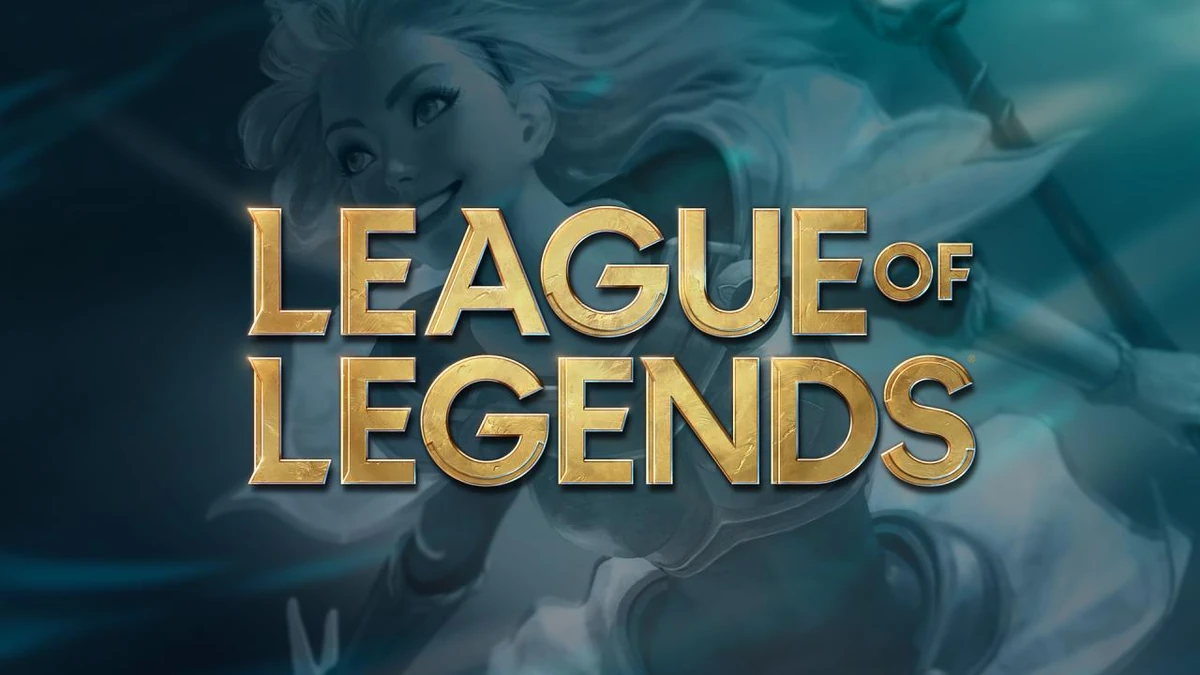

#Data gathering and overview

## Data observation
This data is obtained from kaggle which is provided by Riot game. It contains data from 9879 high ranking(diamand1 to master) matches with 19 features of both sides and a target variable indicating the match result. 

### Features explanation


*   Ward: An item that players can place on the map to reveal the nearby area. Very useful for map/objectives control.
*   Assist: Awards partial gold and experience points when damage is done to contribute to an enemy's death.
*   Elite Monsters: Monsters with high hp/damage that give a massive bonus (gold/XP/stats) when killed by a team.
*   Dragon: AKA Drake. This powerful neutral monster grants various permanent effects and buffs when when killed by a team.
*   Herald: A monster that spawns on the eigth minute. Grants a buff that allows the user to spawn the Herald for your team to help push towers and lanes.
*   Tower: A structure that blocks the enemy’s path to the base. They take high damage and fire at opponents within a certain radius.
*   Gold: Currency awarded for killing monsters or enemy players as well as for completing objectives.
*   Level: Champion level. Start at 1. Max is 18
*   Minions: Non-player characters (NPCs) that spawn from each team’s base.
*   Jungle Minions: NPC that belong to NO TEAM. They give gold and temporary buffs when killed by players.






In [1]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/high_diamond_ranked_10min.csv')
pd.set_option('display.max_columns', 40)
display(df.head(5), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


None

All columns are numerical value and do not have null value

# Data Preparation
We will use the orginal staging to creat different version of dataset with different features, because there is no Null value and we trust the data is accurate.
Two version of dataset to be prepared


*   df_all: Unaltered dataframe with all original features included.
*   df_select: dataframe with only independently controllable features and non-aggregate features



In [2]:
# dataframe with no feature removed
df_all=df.drop("gameId",axis=1).copy()
df_all.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
# datafame with only selected features
df_select = df[['blueWins','blueWardsPlaced', 'blueWardsDestroyed', 
                'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 
                'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 
                'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
                'redWardsPlaced', 'redWardsDestroyed', 
                'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 
                'redDragons', 'redHeralds', 'redTowersDestroyed', 
                'redTotalMinionsKilled', 'redTotalJungleMinionsKilled']]
df_select.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,195,36,15,6,0,6,9,8,0,0,0,197,55
1,0,12,1,0,5,5,5,0,0,0,174,43,12,1,1,5,5,2,1,1,1,240,52
2,0,15,0,0,7,11,4,1,0,0,186,46,15,3,1,11,7,14,0,0,0,203,28
3,0,43,1,0,4,5,5,0,1,0,201,55,15,2,1,5,4,10,0,0,0,235,47
4,0,75,4,0,6,6,6,0,0,0,210,57,17,2,1,6,6,7,1,0,0,225,67


# EDA
We will check whether there are any redundant features in our two datasets and if there is any high multicollinearity that we might need to address.



In [4]:
from matplotlib import gridspec
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def cor_heat_map(df, digist=3, cmap='coolwarm'):
  '''
  creat a correlation heat_map to visualize the multicollinearity

  Args:
    df (DataFrame) : DataFrame with features to check multicollinearity on.
    digits (int) : Number of decimal places to display
    cmap (str) : Colormap to display correlation range. 

  Returns:
    fig: Matplotlib figures
    ax: Matplotlib axis
  '''
  # create correlation matrix from dataframe
  correl=df.corr().round(digist)

  # create mask for upper triangle
  mask=np.zeros_like(correl)
  mask[np.triu_indices_from(mask)] = True

  # create heatmap
  fig,ax=plt.subplots(figsize=((len(df.columns)),(len(df.columns))))
  sns.heatmap(correl,annot=True,ax=ax,cmap=cmap,vmin=-1,vmax=1,mask=mask)

  return fig,ax

def vis_eda(df,target,col):
  '''
  create a histogram with KDE, a boxplot and a scatter plot with linear
  regression for one specified column, to visualizing the shape of data,
  outliers and check correaltion with target variable

  Args:
    df (DataFrame) : DataFrame containing column to plot
    target (str) : Name of target variable.
    col (str) : Name of the column to plot.

  Returns:
    fig : Matplotlib Figure
    gs : Matplotlib GridSpec
  '''
  # get specified col and name
  data = df[col].copy()
  name=col

  # calculate median and mean
  median=data.median().round(2)
  mean=data.mean().round(2)

  # set figures detail for plots
  fig = plt.figure(figsize=(11,6))
  gs = GridSpec(nrows=2,ncols=2)
  ax0 = fig.add_subplot(gs[0, 0])
  ax1 = fig.add_subplot(gs[1, 0])
  ax2 = fig.add_subplot(gs[:, 1])

  # create histogram and KDE
  sns.histplot(data,alpha=0.5,stat='density',ax=ax0)
  sns.kdeplot(data,color='green',ax=ax0)
  ax0.set(ylabel='Density',title=name)
  ax0.set_title(f"Distribution of {name}")
  ax0.axvline(median,label=f'median={median:,}',color='black')
  ax0.axvline(mean,label=f'mean={mean:,}',color='black',ls=':')
  ax0.legend()

  # creat boxplot
  sns.boxplot(data,x=col,ax=ax1)
  ax1.set_title(F"Box Plot of {name}")

  # creat scatterplot
  sns.regplot(data=df, x=col, y=target, line_kws={"color": "red"}, ax=ax2)
  ax2.set_title(F"Scatter Plot of {name}")

  fig.tight_layout()

  return fig,gs



(<Figure size 2808x2808 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0c49ca0390>)

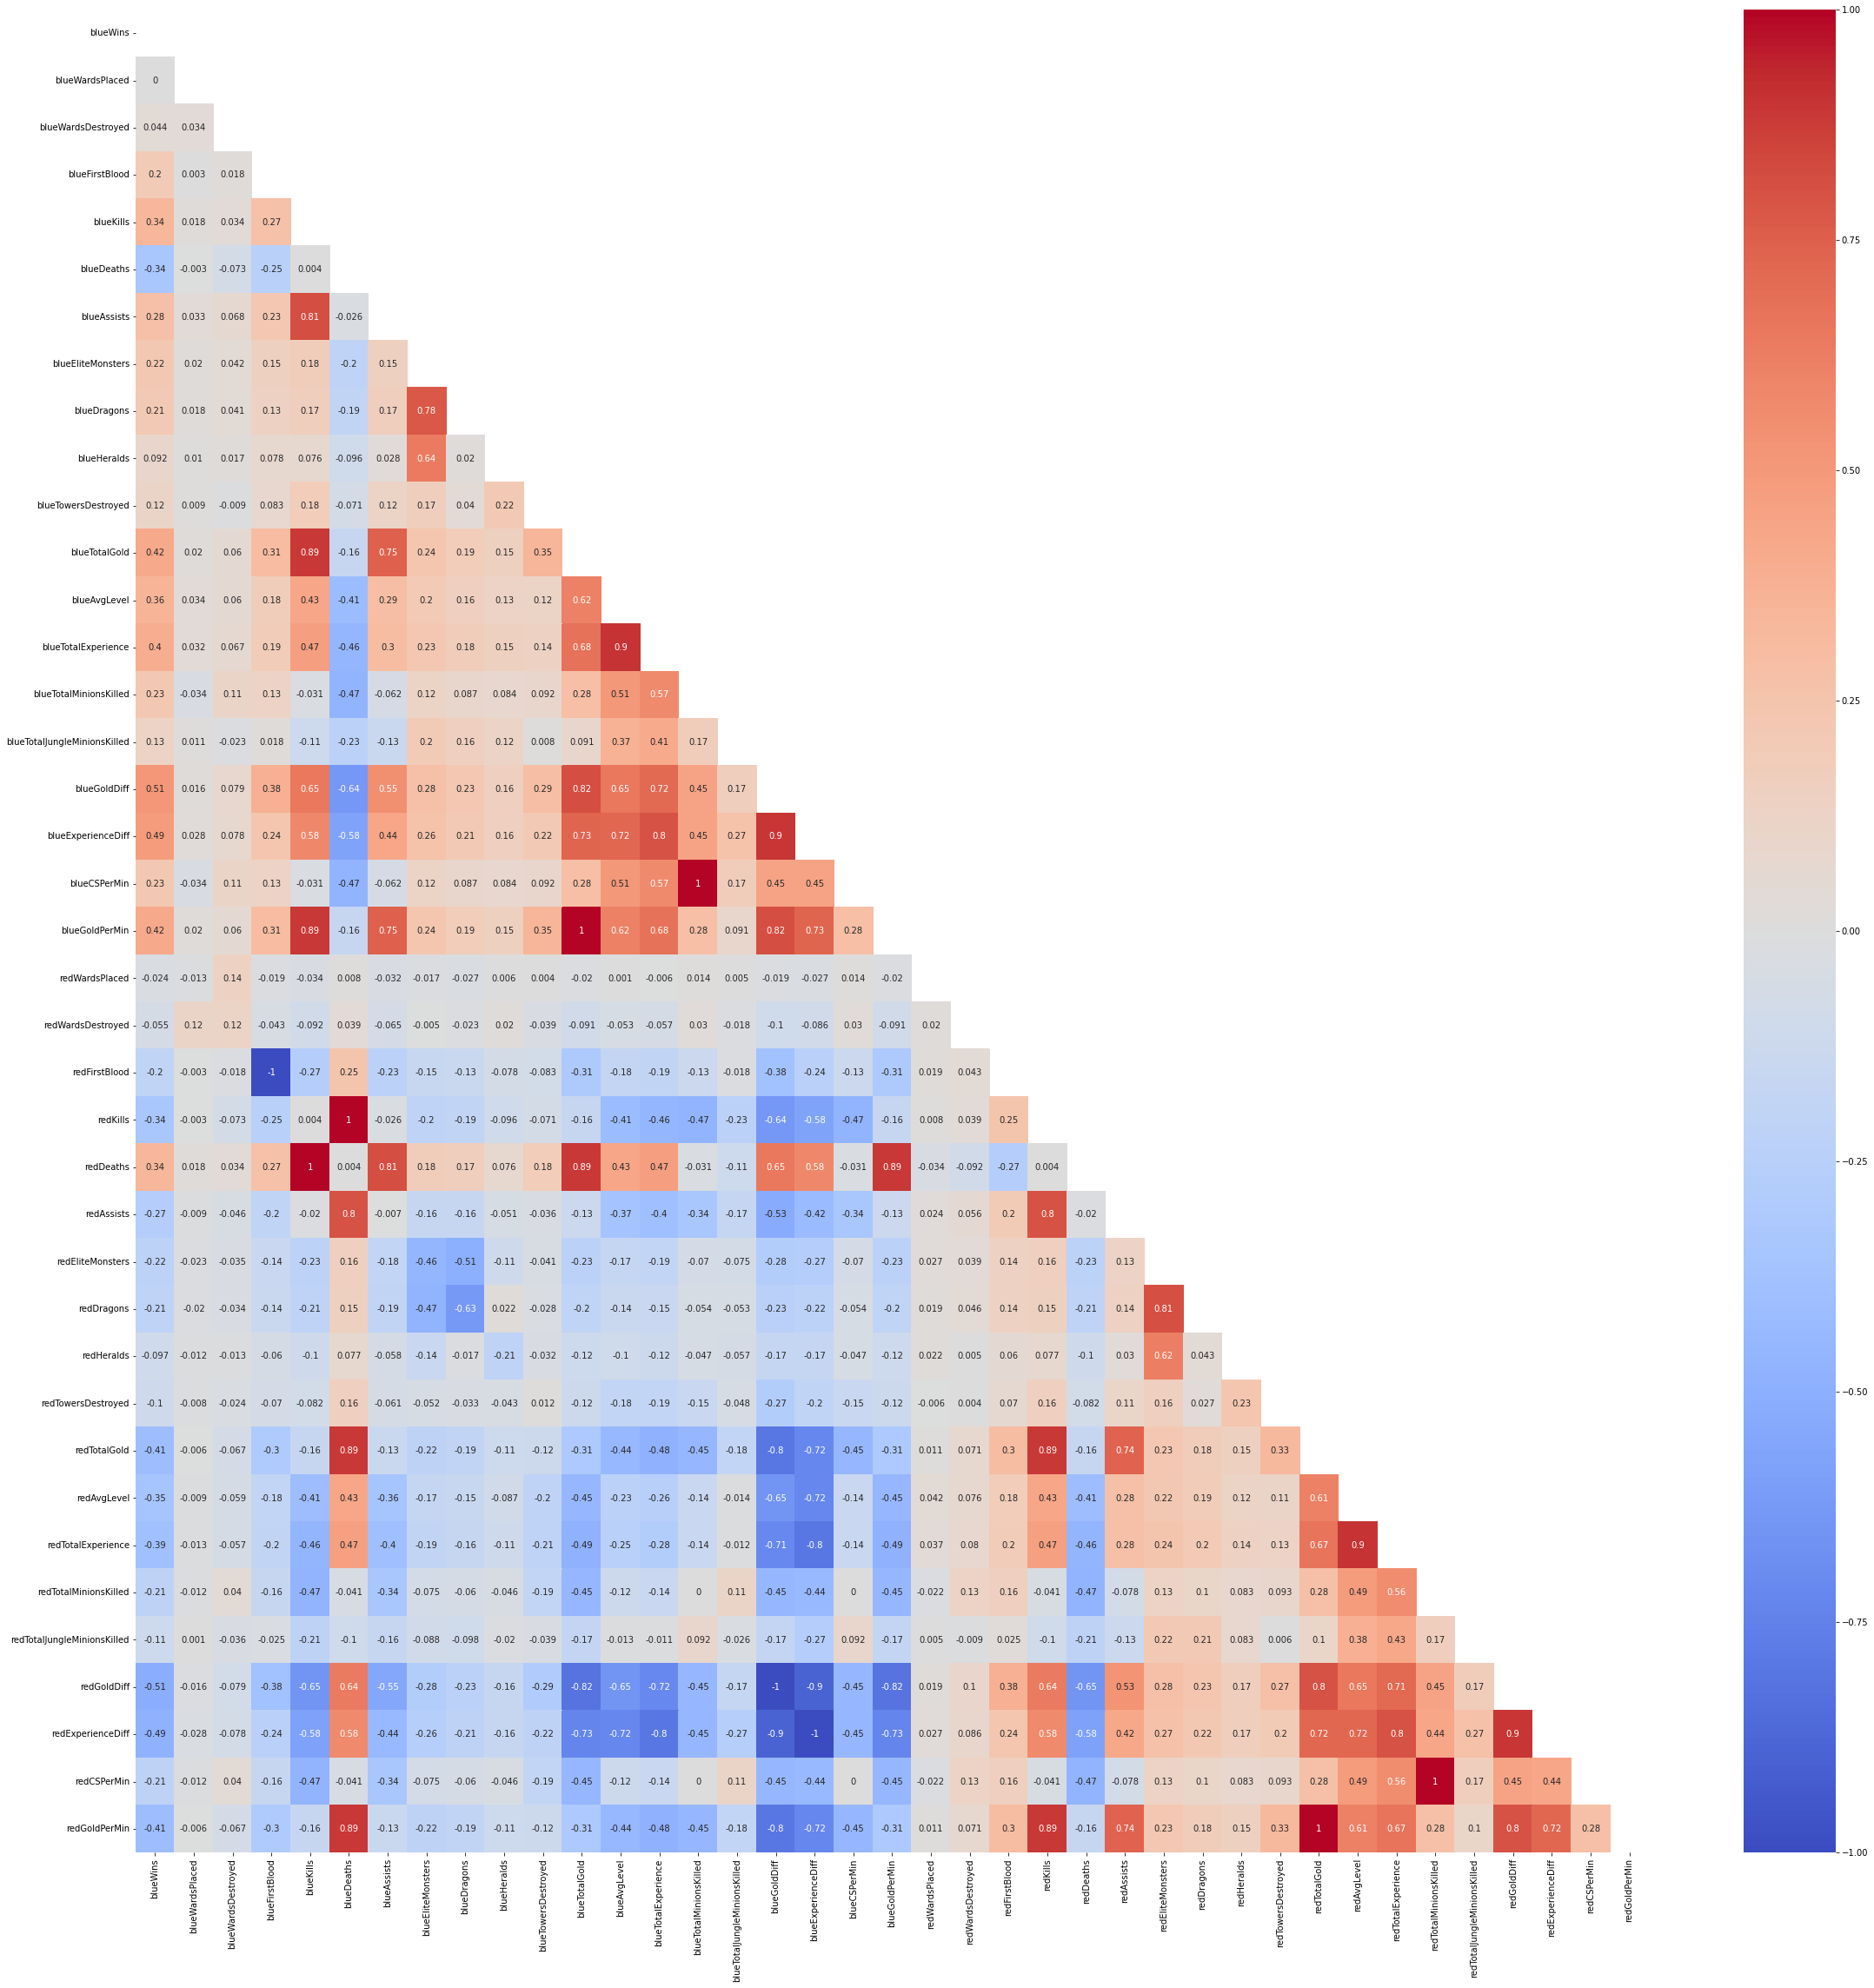

In [5]:
# correaltion heatmap for df_all
cor_heat_map(df_all)

From the heatmap, we can find df_all contains multiple features with high multicollinearity, which is not friendly to logistic regression. So, we will exclude them from df_select.

(<Figure size 1656x1656 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0c3a533f10>)

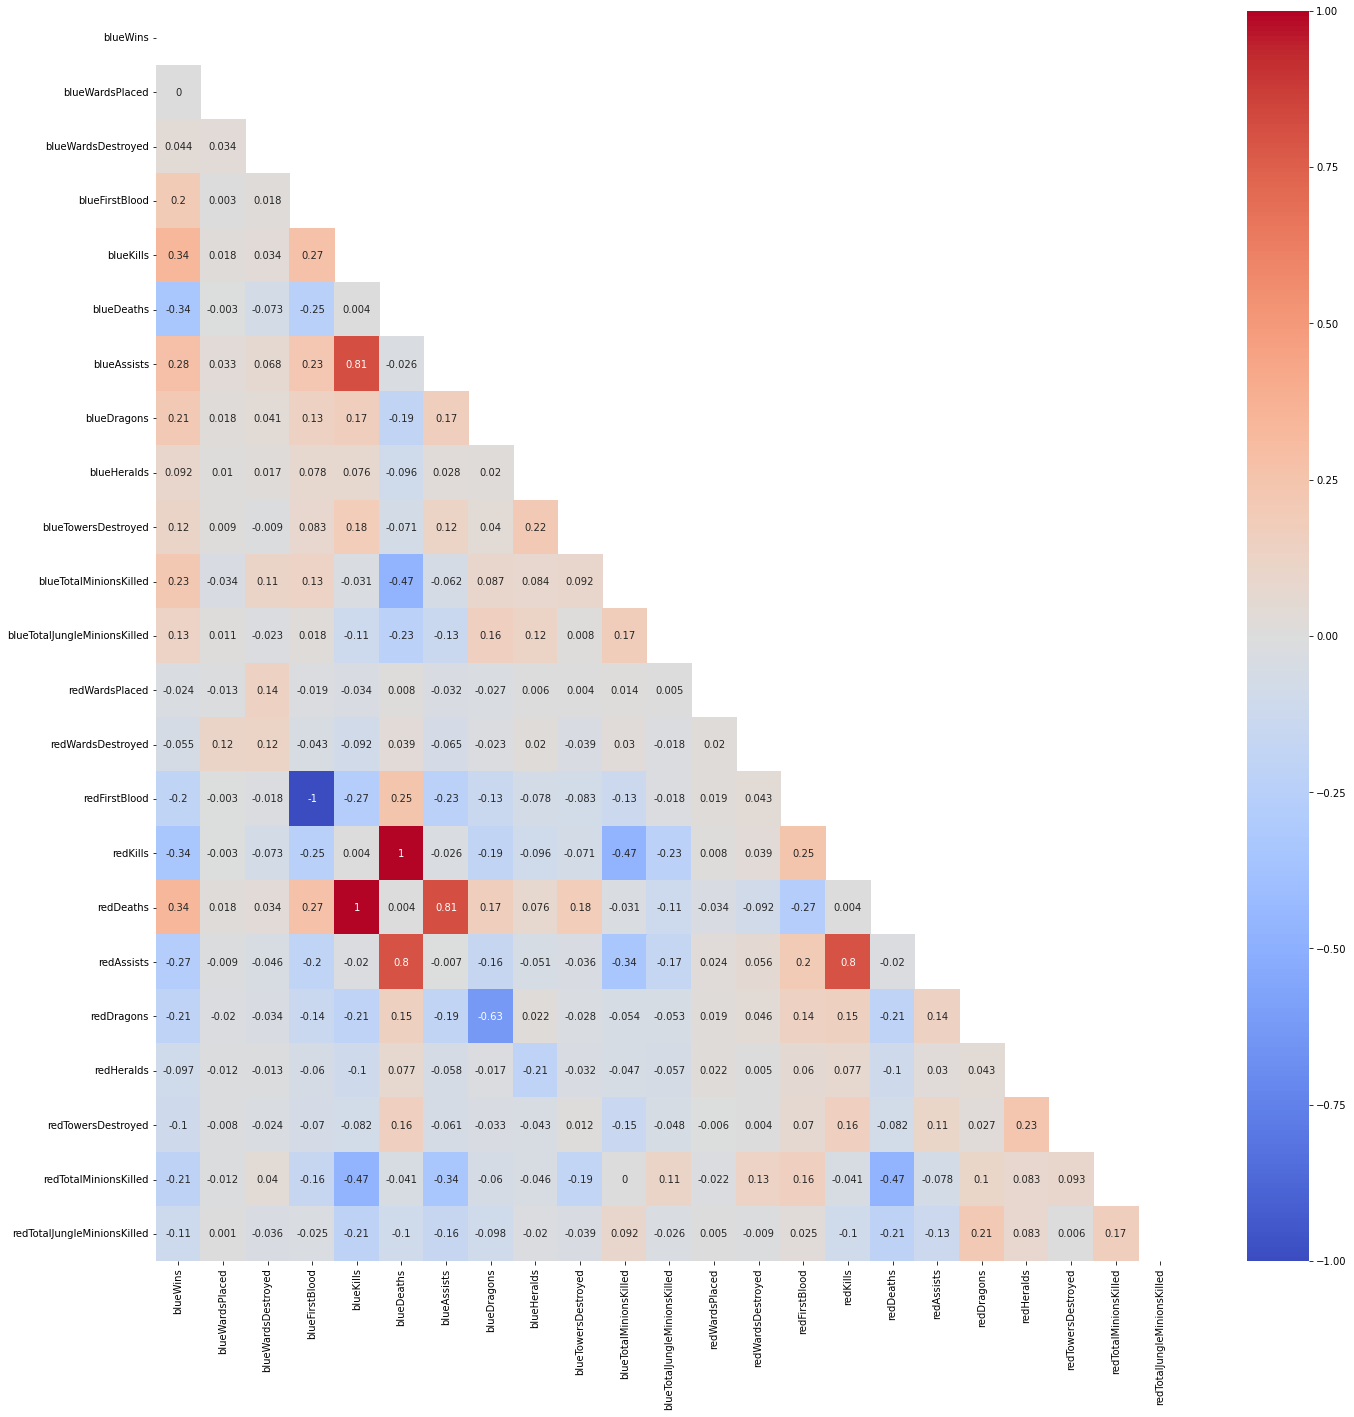

In [6]:
#correaltion map for df_select
cor_heat_map(df_select)

We still can find some features with high multicolinearity(redDeaths, Bluekills, redAssists, BlueAssists, redFirstBlood, BlueFirstBlood). Since the Assists has significant influence on matches's results, and the coefficients of them between Bluekills and RedKills are not too high, we will keep them for following analysis

In [7]:
#Drop columns with high multicollinearity.
df_select.drop(columns=['redKills', 'redDeaths', 'redFirstBlood'], inplace=True)
df_select.columns

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')

(<Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0c38966590>)

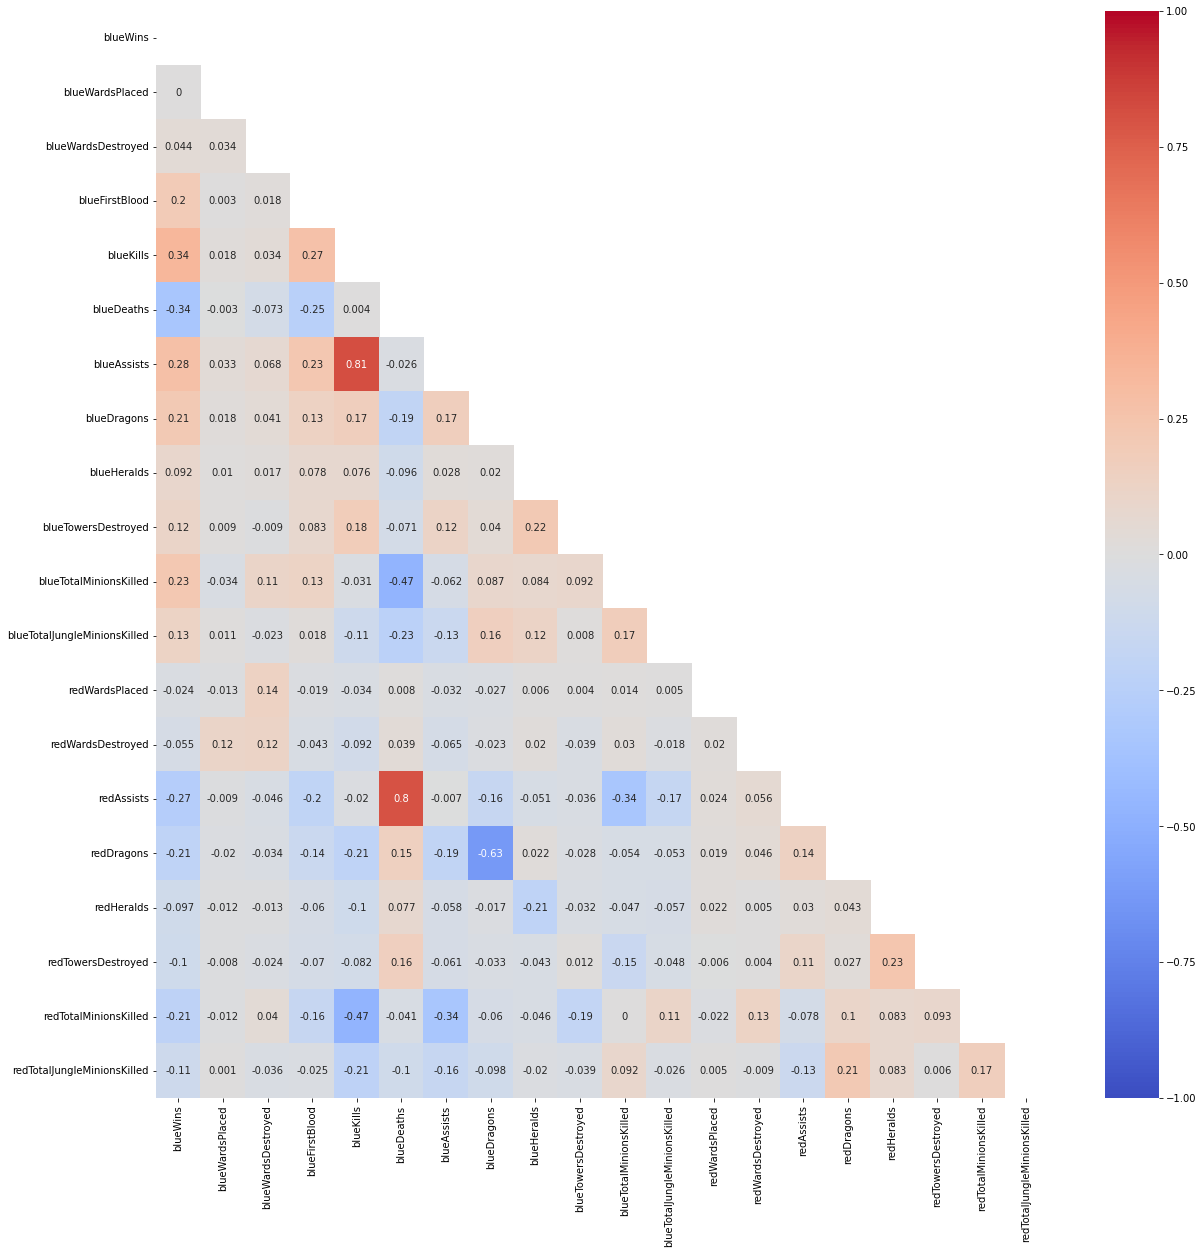

In [8]:
#check correaltion map again
cor_heat_map(df_select)

Let's check whether our target variable is balance

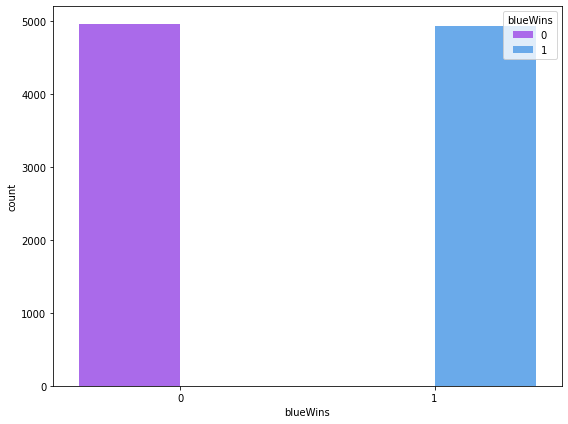

In [9]:
# creat a histogram on bluewin

fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='blueWins', data=df_select, hue='blueWins', palette='cool_r')

# Save as image
plt.tight_layout()

Our target variable does not have imbalanced problem

In [12]:
df_select.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

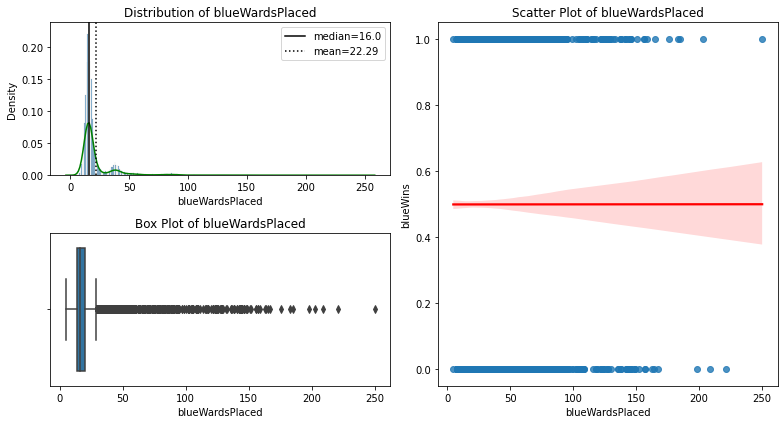

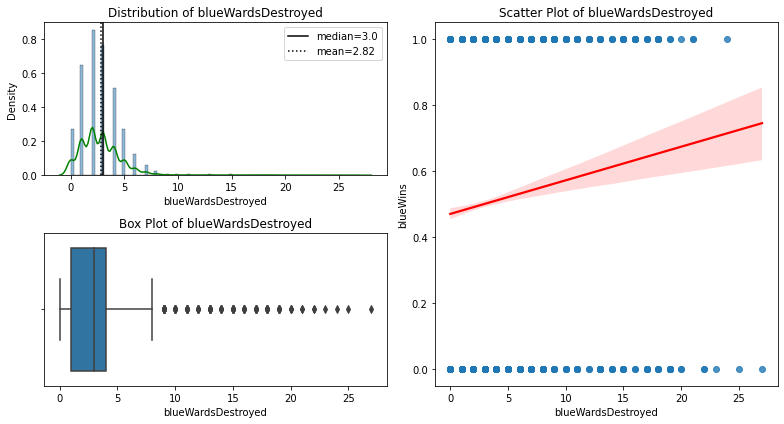

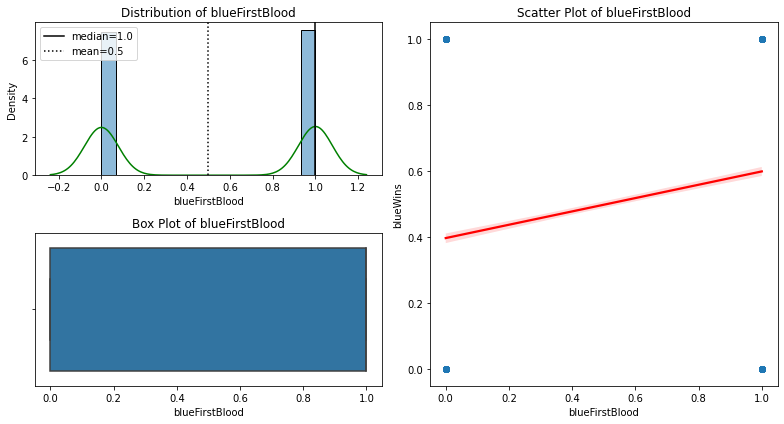

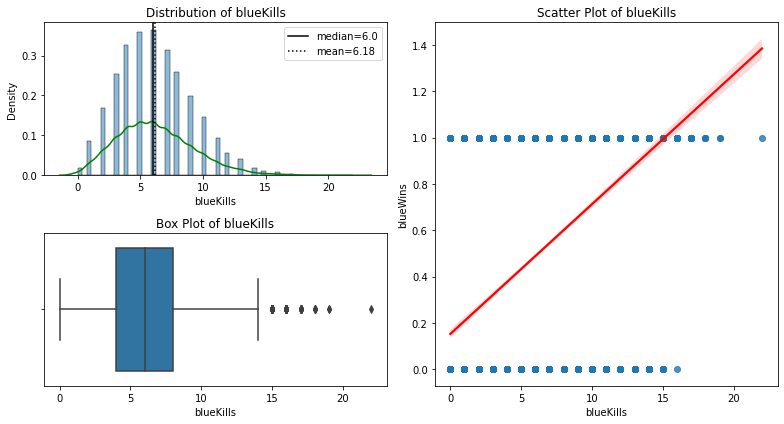

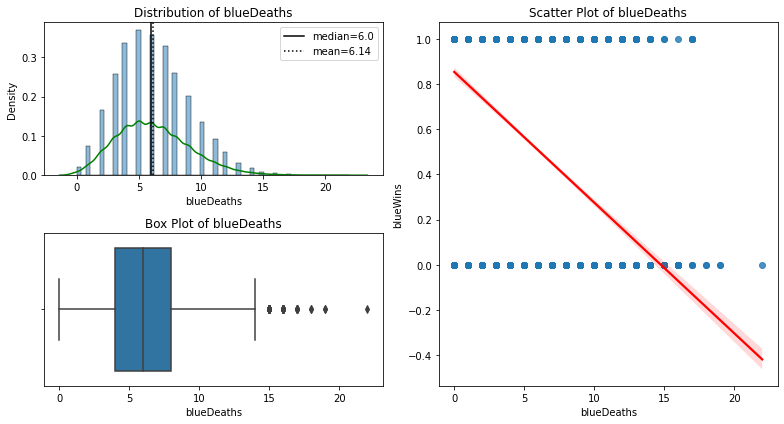

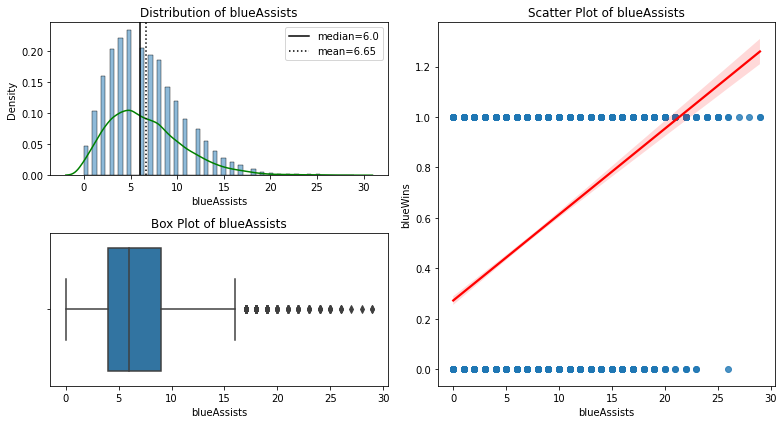

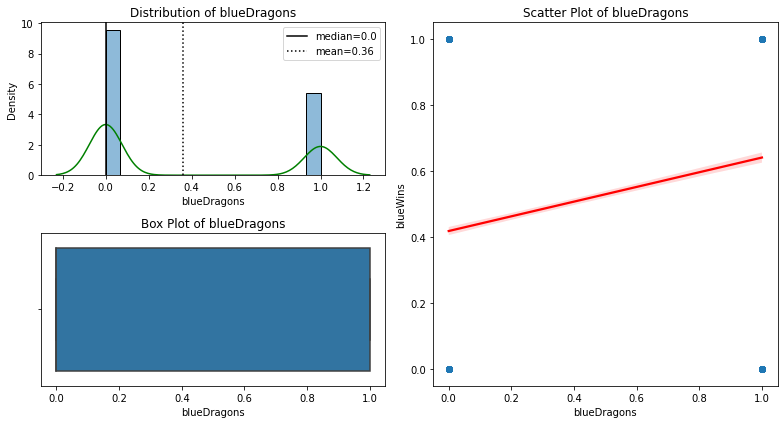

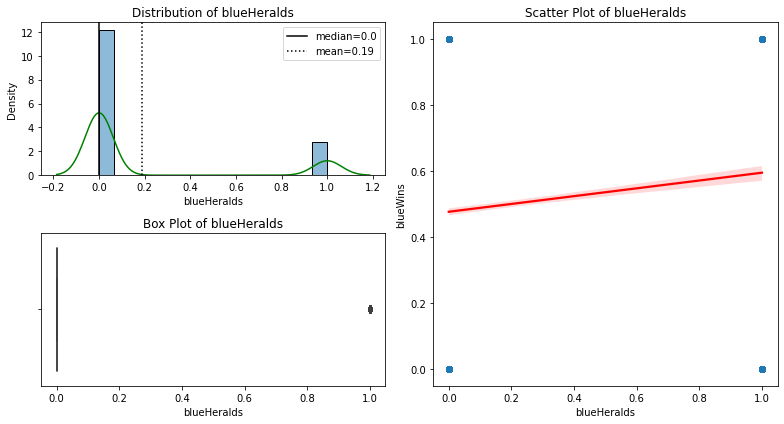

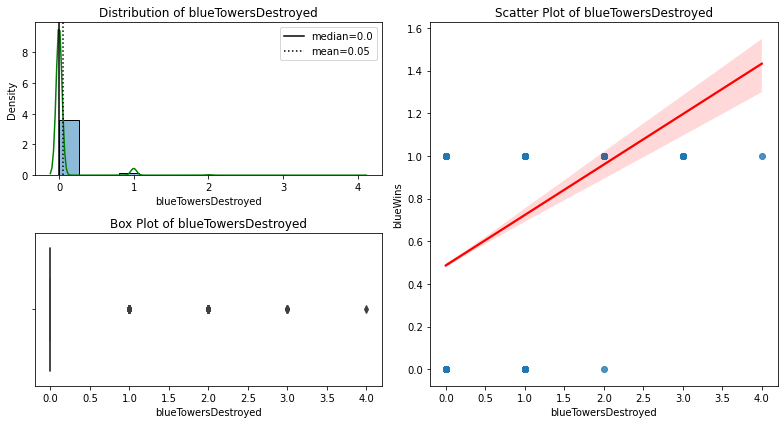

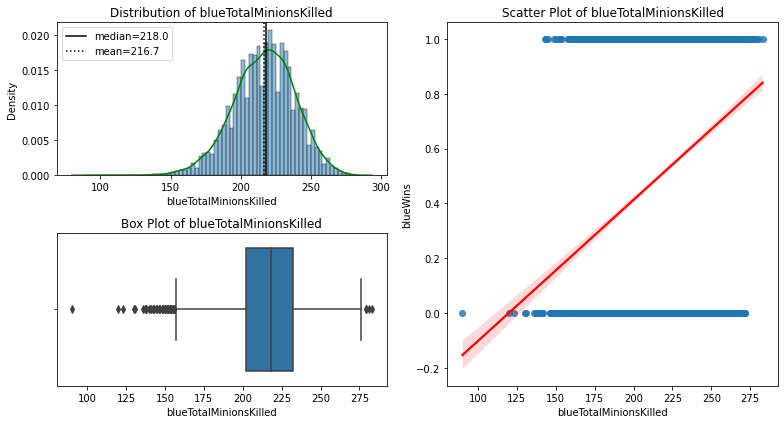

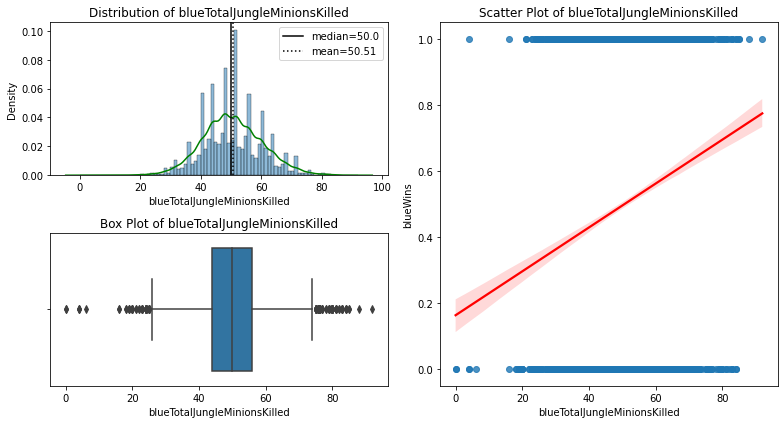

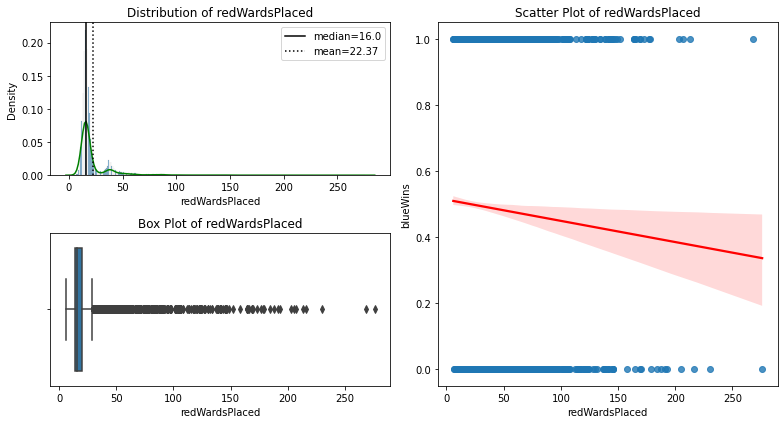

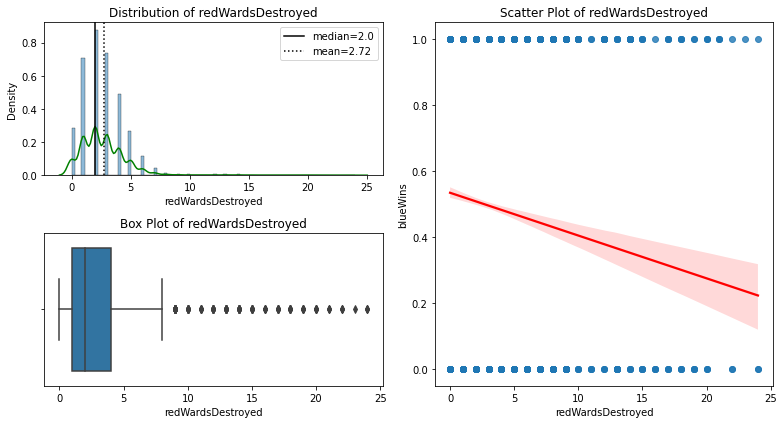

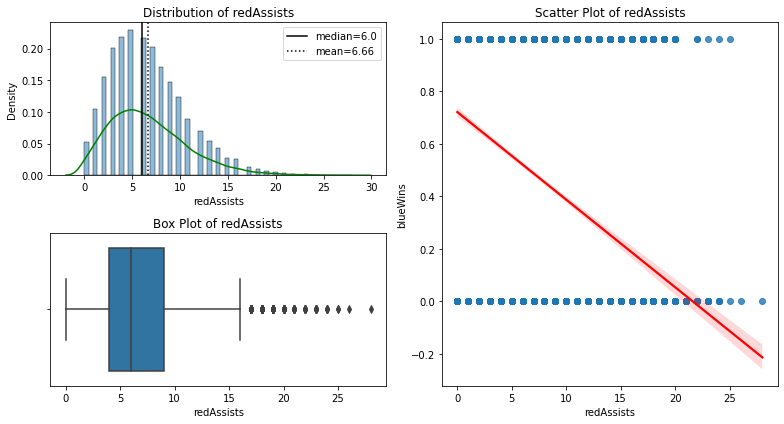

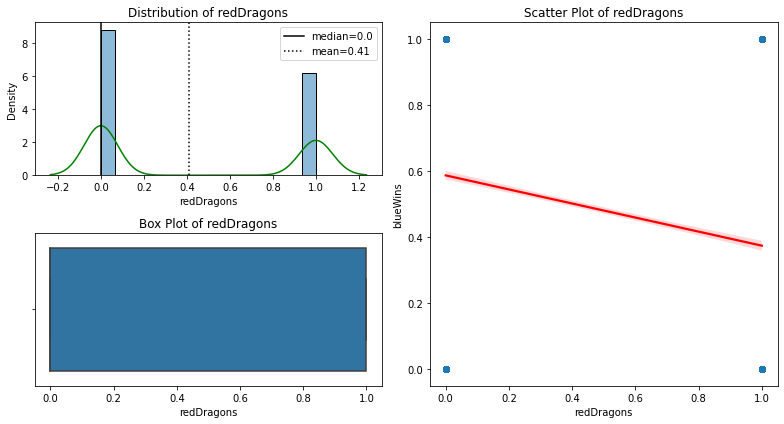

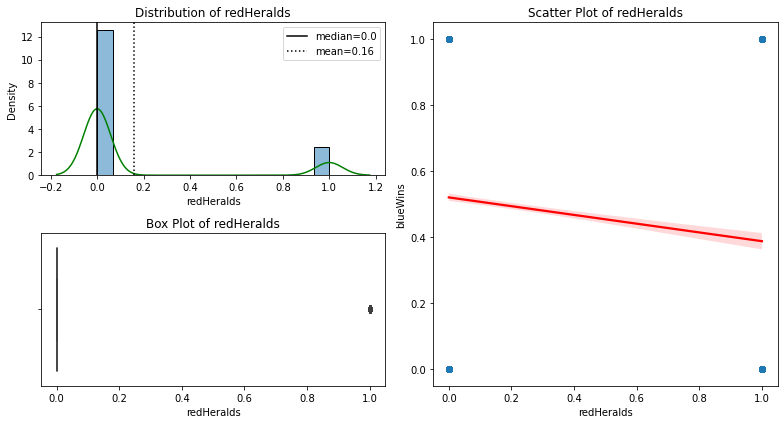

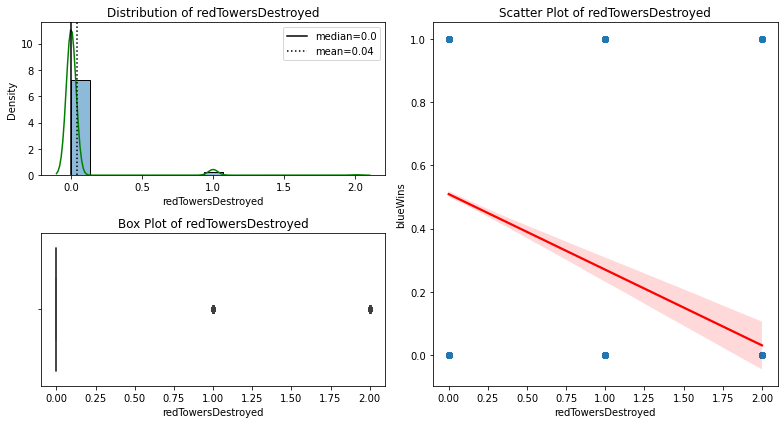

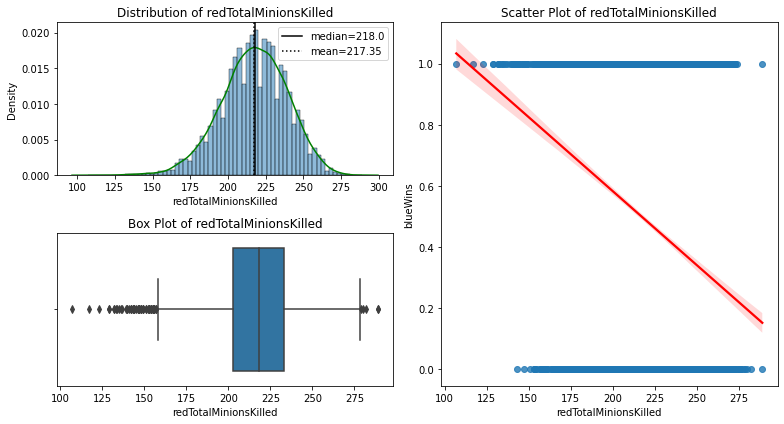

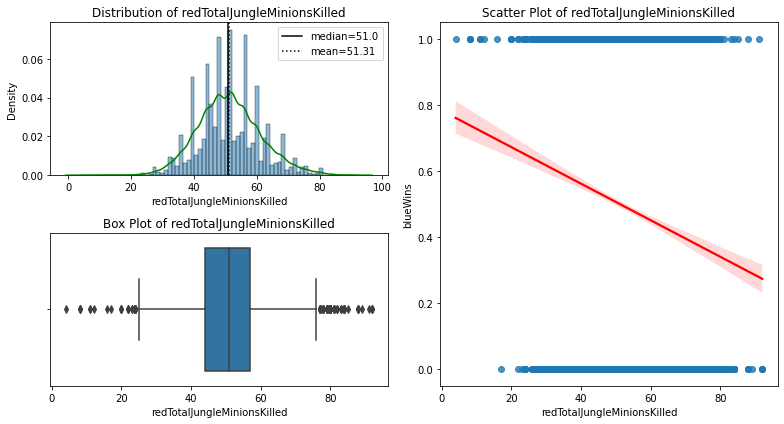

In [14]:
cols=df_select.drop('blueWins', axis=1).columns
for i in cols :
  vis_eda(df_all,'blueWins', i)

#Model

In this project we will implement a logistical regression model as a baseline. Then, a randomforest and XGboost will be applied with Gridsearch to fine-tune the hyper-parameter 

In [28]:
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from xgboost import XGBRFClassifier

#Logistical regression
def logRegression(x_train,x_test,y_train,y_test,gs=False,par_list=None):
  
  '''
  train a Logistical regression return trained model;
  use gridsearch to find best combination of hyper-parameters(if gs=True)
  plot a confusion matrix and ROC curve  
  args: 
    x_train: features given to model
    y_train: target variable given to model
    x_test: features used for validation
    y_test: target variable used for validation
    gs(bool): wether use gridsearch to find best hyper-parameters
    par_list(dict) when gs=True: hyper-parameters for gs ; when gs=False hyper-parameters fed to model
  returns:
    model: trained model
  '''
  model = LogisticRegression(max_iter=3000)
  if gs :
    model, hyper_params = best_hyperpar_est(model, par_list, x_train, y_train)
    print('the best combination of hyper-parameters is:')
    print(hyper_params)
  else:
    model.set_params(**par_list)

  
  model.fit(x_train,y_train)

  y_hat_train = model.predict(x_train)
  y_hat_test = model.predict(x_test)

  print("prediction report on train set")
  print(metrics.classification_report(y_train,y_hat_train))

  print("prediction report on test set")
  print(metrics.classification_report(y_test,y_hat_test))

  metrics.plot_confusion_matrix(model,x_test,y_test)
  metrics.plot_roc_curve(model,x_test,y_test)

  return model


#xgBoost Random Forest
def ranForest(x_train,x_test,y_train,y_test,gs=False,par_list=None):
  '''
  train a Random Forest return trained model;
  use gridsearch to find best combination of hyper-parameters(if gs=True)
  plot a confusion matrix and ROC curve  
  args: 
    x_train: features given to model
    y_train: target variable given to model
    x_test: features used for validation
    y_test: target variable used for validation
    gs(bool): wether use gridsearch to find best hyper-parameters
    par_list(dict, required when gs=True): hyper-parameter for gs
  returns:
    model: trained model
  '''
  model=XGBRFClassifier()
  if gs:
    model, hyper_params = best_hyperpar_est(model, par_list, x_train, y_train)
    print('the best combination of hyper-parameters is:')
    print(hyper_params)
  else:
    model.set_params(par_list)
  
  model.fit(x_train,y_train)

  y_hat_train = model.predict(x_train)
  y_hat_test = model.predict(x_test)

  print("prediction report on train set")
  print(metrics.classification_report(y_train,y_hat_train))

  print("prediction report on test set")
  print(metrics.classification_report(y_test,y_hat_test))

  metrics.plot_confusion_matrix(model,x_test,y_test)
  metrics.plot_roc_curve(model,x_test,y_test)

  return model

#gridsearch
def best_hyperpar_est(model, par_list, x, y):
  '''
  use gridsearch to find best hyper-parmeter and estimator
  args:
    model : model to be fine-tuned
    parlist(dict) : hyper-parameters for gs
    x : features used to select hyper-parameters
    y : target variable to select hyper-parmeters
  returns:
    best_est : sklearn estimetor instance with best hyper-parameter
    best_par : best combination of hyper_parameter
  '''
  grid=GridSearchCV(model, par_list, scoring='recall_macro')
  grid.fit(x,y)
  best_est = grid.best_estimator_
  best_par = grid.best_params_

  return best_est, best_par



## Logistic regression with gird search on df_select

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

the best combination of hyper-parameters is:
{'C': 0.1, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'saga'}
prediction report on train set
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      3455
           1       0.73      0.72      0.72      3460

    accuracy                           0.72      6915
   macro avg       0.72      0.72      0.72      6915
weighted avg       0.72      0.72      0.72      6915

prediction report on test set
              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1494
           1       0.71      0.72      0.72      1470

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


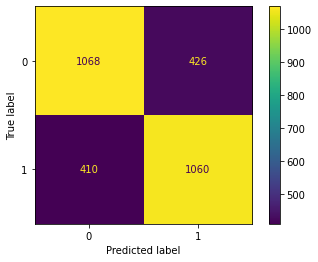

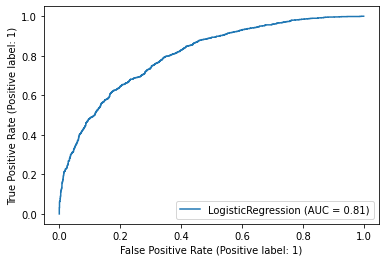

In [17]:
X=df_select.drop('blueWins',axis=1)
Y=df_select['blueWins']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
par_list={'C': [0.001, 0.01, 0.1, 1, 10, 100,1e6,1e12],
          'penalty': ['l1', 'l2','elasticnet'],
          'fit_intercept': [True, False],
          'solver':["liblinear", "newton-cg", "lbfgs", "sag","saga"],}
Lregression_select=logRegression(x_train,x_test,y_train,y_test,gs=True,par_list=par_list)

The highest performance we can reach on Logistical regression by feeding all features in df_select is percision=0.72, recall=0.72, f1-score=0.72 It seems like we do not have any underfitting or overfitting issues. It is good as a baseline model

In [18]:
#save model for futher analysis
import pickle

filename = '/content/drive/MyDrive/lol_winning_model/LogRegression_select.sav'
pickle.dump(Lregression_select, open(filename, 'wb'))

#To load model
# Lregression_select = pickle.load(open(filename, 'rb'))

## Logistic regression with gird search on df_all

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


prediction report on train set
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      3457
           1       0.73      0.74      0.73      3458

    accuracy                           0.73      6915
   macro avg       0.73      0.73      0.73      6915
weighted avg       0.73      0.73      0.73      6915

prediction report on test set
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1492
           1       0.72      0.70      0.71      1472

    accuracy                           0.71      2964
   macro avg       0.71      0.71      0.71      2964
weighted avg       0.71      0.71      0.71      2964



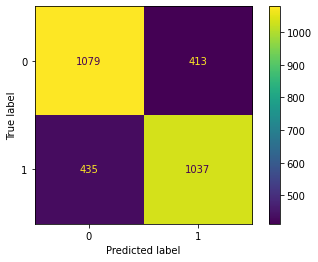

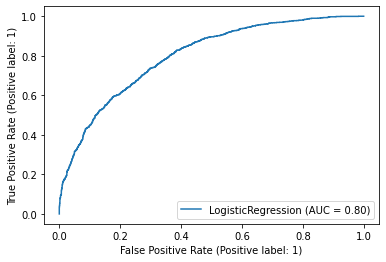

In [30]:
X=df_all.drop('blueWins',axis=1)
Y=df_all['blueWins']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
par_list={'C': 0.1, 'class_weight': 'balanced', 'fit_intercept': True, 'penalty': 'l1', 'solver': 'saga'}
Lregression_all=logRegression(x_train,x_test,y_train,y_test,gs=False,par_list=par_list)

The same model applied on df_all generate result with slightly lower AUC and recall. So in further analysis we will exclude those features with high multicolinearity

## XGBoost Random Forest with gridsearch on df_select

the best combination of hyper-parameters is:
{'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 100, 'subsample': 0.3}
prediction report on train set
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      3422
           1       0.74      0.73      0.74      3493

    accuracy                           0.73      6915
   macro avg       0.73      0.73      0.73      6915
weighted avg       0.73      0.73      0.73      6915

prediction report on test set
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1527
           1       0.71      0.74      0.72      1437

    accuracy                           0.73      2964
   macro avg       0.73      0.73      0.73      2964
weighted avg       0.73      0.73      0.73      2964



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


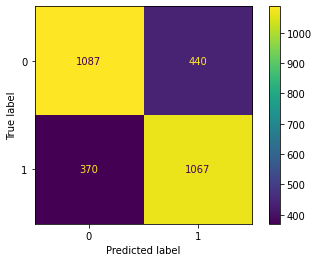

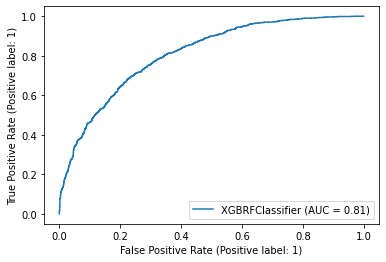

In [31]:
X=df_select.drop('blueWins',axis=1)
Y=df_select['blueWins']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
par_list={'learning_rate': [0.03, 0.05, 0.06],
          'max_depth': [4, 5, 6],
          'min_child_weight': [2, 3, 4],
          'subsample': [0.3, 0.4, 0.5],
          'n_estimators': [100]}
RForest_select=ranForest(x_train,x_test,y_train,y_test,gs=True,par_list=par_list)

In [49]:
#save model for further anylsis
path='/content/drive/MyDrive/lol_winning_model/XGRanForest.json'
RForest_select.save_model(path)

#get model
# import xgboost as xgb
# RForest_select = xgb.Booster()
# RForest_select.load_model(path)

The highest performance we can reach on XGboost Random Forest by feeding all features in df_select is percision=0.73, recall=0.73, f1-score=0.73, and we do not have serious underfitting or overfitting problems. So far XGboost Random Forest generate the best result on df_select. Our baseline model Logsitaical regression is slightly behind that.

# Feature importance analysis

We can extract the importance and coefficient from our trained Random Forest and Logistical Regression model. So, we can identify the impact of each features on the match result. Even if our best model is the XGboost Random Forest model, we will perform this analysis on both model to better interpret the data. Based on the finding, we can provide the final recommandation to the e-sport coach to help them improve their strategy.

In [32]:
# get coefficient value from Logistical Regression model
log_coeff = pd.Series(Lregression_select.coef_.flatten(),
               index=x_train.columns).sort_values(ascending=False)
log_coeff

blueDragons                     0.257533
blueKills                       0.242866
blueTowersDestroyed             0.192025
blueFirstBlood                  0.081119
blueHeralds                     0.072135
blueTotalJungleMinionsKilled    0.021485
blueTotalMinionsKilled          0.009405
blueWardsDestroyed              0.003253
redTowersDestroyed              0.000000
blueAssists                    -0.000749
blueWardsPlaced                -0.001136
redWardsPlaced                 -0.001269
redTotalMinionsKilled          -0.010117
redAssists                     -0.010325
redWardsDestroyed              -0.013621
redTotalJungleMinionsKilled    -0.015817
redHeralds                     -0.055519
redDragons                     -0.191162
blueDeaths                     -0.242496
dtype: float64

In [33]:

# convert coefficient to odds and subtract 1
log_odds = np.exp(log_coeff) - 1

#rename features
renamed_cols = {'blueKills': 'Kills',
                'blueTotalJungleMinionsKilled': 'Total Jungle Minions Killed',
                'blueTotalMinionsKilled': 'Total Minions Killed',
                'blueTowersDestroyed': 'Towers Destroyed',
                'blueDragons': 'Dragons Killed',
                'blueHeralds': 'Heralds Killed',
                'blueFirstBlood': 'First Blood',
                'blueAssists': 'Assists',
                'blueWardsDestroyed': 'Wards Destroyed',
                'blueWardsPlaced': 'Wards Placed',
                'redWardsDestroyed': 'Enemy Wards Destroyed',
                'redHeralds': 'Enemy Heralds Killed',
                'redTowersDestroyed': 'Enemy Towers Destroyed',
                'redAssists': 'Enemy Assists',
                'redWardsPlaced': 'Enemy Wards Placed',
                'redDragons': 'Enemy Dragons Killed',
                'redTotalJungleMinionsKilled': 'Enemy Total Jungle Minions Killed',
                'redTotalMinionsKilled': 'Enemy Total Minions Killed',
                'blueDeaths': 'Enemy Kills'
               }

log_odds.rename(renamed_cols, inplace=True)
log_odds


Dragons Killed                       0.293735
Kills                                0.274898
Towers Destroyed                     0.211701
First Blood                          0.084500
Heralds Killed                       0.074800
Total Jungle Minions Killed          0.021717
Total Minions Killed                 0.009450
Wards Destroyed                      0.003259
Enemy Towers Destroyed               0.000000
Assists                             -0.000749
Wards Placed                        -0.001135
Enemy Wards Placed                  -0.001268
Enemy Total Minions Killed          -0.010066
Enemy Assists                       -0.010272
Enemy Wards Destroyed               -0.013529
Enemy Total Jungle Minions Killed   -0.015693
Enemy Heralds Killed                -0.054006
Enemy Dragons Killed                -0.174001
Enemy Kills                         -0.215333
dtype: float64

(-0.3, 0.3)

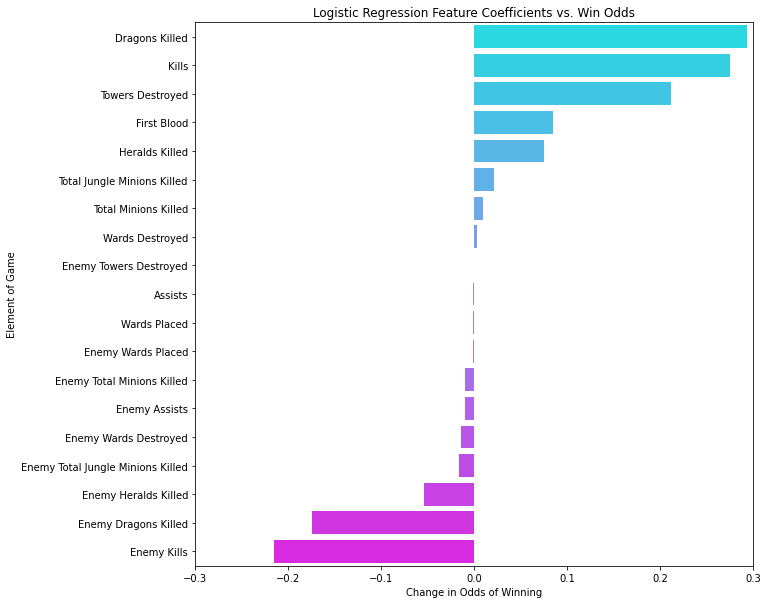

In [39]:
# Create bar plot of feature coefficients as odds.
fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(x=log_odds.values, y=log_odds.index, palette='cool', ax=ax, orient='h')

ax.set_title('Logistic Regression Feature Coefficients vs. Win Odds')
ax.set_xlabel('Change in Odds of Winning')
ax.set_ylabel('Element of Game')
ax.set_xlim([-.3, 0.3])

In [41]:
# get feature importances of Xgboost Random Forest
xgb_importance = pd.Series(RForest_select.feature_importances_,index=x_train.columns).sort_values(ascending=False)
xgb_importance.rename(renamed_cols, inplace=True)
xgb_importance


Enemy Kills                          0.205898
Kills                                0.193579
Enemy Dragons Killed                 0.059674
Assists                              0.057827
Dragons Killed                       0.051360
Enemy Assists                        0.042897
Enemy Total Minions Killed           0.041794
Towers Destroyed                     0.041502
Total Minions Killed                 0.040108
Total Jungle Minions Killed          0.033178
Enemy Heralds Killed                 0.031434
Heralds Killed                       0.028893
Enemy Total Jungle Minions Killed    0.028219
First Blood                          0.028207
Enemy Wards Placed                   0.025617
Wards Placed                         0.022625
Wards Destroyed                      0.022527
Enemy Towers Destroyed               0.022476
Enemy Wards Destroyed                0.022184
dtype: float32

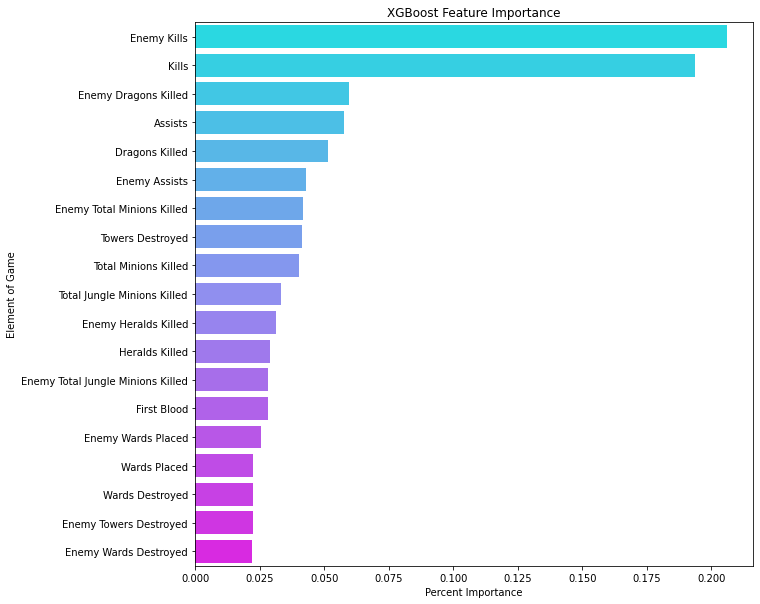

In [42]:
# Create bar plot of feature importances.
fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(x=xgb_importance.values, y=xgb_importance.index, palette='cool', ax=ax, orient='h')

ax.set_title('XGBoost Feature Importance')
ax.set_xlabel('Percent Importance')
ax.set_ylabel('Element of Game');

We can see from the bar plots that the features importances and the coefficients of two models give similar result on the significance of different features. Now we normalize two critira to same scale and accumulate them together to get the final result 

In [55]:
log_coeff_norm=log_odds.abs()
log_coeff_norm=(log_coeff_norm-log_coeff_norm.min())/(log_coeff_norm.max()-log_coeff_norm.min())
log_coeff_norm

Dragons Killed                       1.000000
Kills                                0.935871
Towers Destroyed                     0.720723
First Blood                          0.287675
Heralds Killed                       0.254653
Total Jungle Minions Killed          0.073934
Total Minions Killed                 0.032171
Wards Destroyed                      0.011094
Enemy Towers Destroyed               0.000000
Assists                              0.002548
Wards Placed                         0.003866
Enemy Wards Placed                   0.004318
Enemy Total Minions Killed           0.034270
Enemy Assists                        0.034969
Enemy Wards Destroyed                0.046058
Enemy Total Jungle Minions Killed    0.053424
Enemy Heralds Killed                 0.183859
Enemy Dragons Killed                 0.592375
Enemy Kills                          0.733086
dtype: float64

In [54]:
xgb_importance=(xgb_importance-xgb_importance.min())/(xgb_importance.max()-xgb_importance.min())
xgb_importance

Enemy Kills                          1.000000
Kills                                0.932943
Enemy Dragons Killed                 0.204067
Assists                              0.194013
Dragons Killed                       0.158810
Enemy Assists                        0.112745
Enemy Total Minions Killed           0.106740
Towers Destroyed                     0.105152
Total Minions Killed                 0.097564
Total Jungle Minions Killed          0.059845
Enemy Heralds Killed                 0.050351
Heralds Killed                       0.036520
Enemy Total Jungle Minions Killed    0.032851
First Blood                          0.032786
Enemy Wards Placed                   0.018683
Wards Placed                         0.002402
Wards Destroyed                      0.001865
Enemy Towers Destroyed               0.001591
Enemy Wards Destroyed                0.000000
dtype: float32

In [60]:
accumu_feature_importance=(xgb_importance+log_coeff_norm)/2
accumu_feature_importance.sort_values(ascending=False,inplace=True)

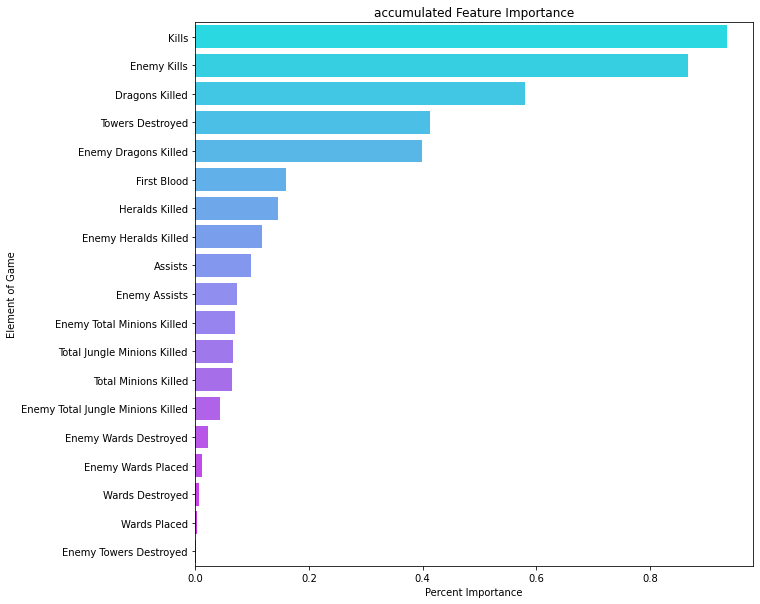

In [61]:
# Create bar plot of feature importances.
fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(x=accumu_feature_importance.values, y=accumu_feature_importance.index, palette='cool', ax=ax, orient='h')

ax.set_title('accumulated Feature Importance')
ax.set_xlabel('Percent Importance')
ax.set_ylabel('Element of Game');

From the bar chart we can tell the kill enemy and avoid being killed are the most important points of the victory. Dragons Killing and Destroying towers have relatively high influence on the matches result

#Conclusion

## Recommendation

Leagues of legends is a game with various elements. Every element have explicit or potential influence on matches result and other elements. However the capacity of players is limited to cover all element well and the players and coach need to make choices on the element they will to scramble for. According to our analysis. Players should try them best to get kills and avoid being killed because these are the most important factor in the match results. When the players cannot take every elements into account, they priority of elements they should focus on is Dragons > Towers > Heralds > Minions > Wards.

## Future work

Leagues of legends is a dynamic game. The strategy should be adjusted according to the real time situation of the match. So far, our analysis is based on the data of the first-ten minutes. In other words, we only provided a general and globle recommendation. To better increace winning rate during the matches, further analysis on the data of other key time points and time-seriers data should be involved. 